In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("startupsci/awesome-datasets-graph")

print("Path to dataset files:", path)


100%|█████████████████████████████████████████████████████████████████████████████| 1.26M/1.26M [00:01<00:00, 1.06MB/s]

Extracting files...


Path to dataset files: C:\Users\STUDENT\.cache\kagglehub\datasets\startupsci\awesome-datasets-graph\versions\1


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import math as mt
from word2number import w2n


In [40]:
df = pd.read_csv("hiring.csv")


In [41]:
df['experience'] =  df['experience'].fillna(value='Zero')

In [43]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [44]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean())

In [45]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.000000,9,50000
1,Zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [46]:
df.experience = df.experience.apply(w2n.word_to_num)

In [47]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [49]:
df2 = df.drop('salary($)',axis='columns')

In [50]:
df2

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [51]:
sal= df['salary($)']

In [53]:
reg = linear_model.LinearRegression()

In [55]:
reg.fit(df2,sal)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
reg.predict([[2,9,6]])

C:\Users\STUDENT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

In [57]:
reg.predict([[12,10,10]])

C:\Users\STUDENT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

In [58]:
import seaborn as sns

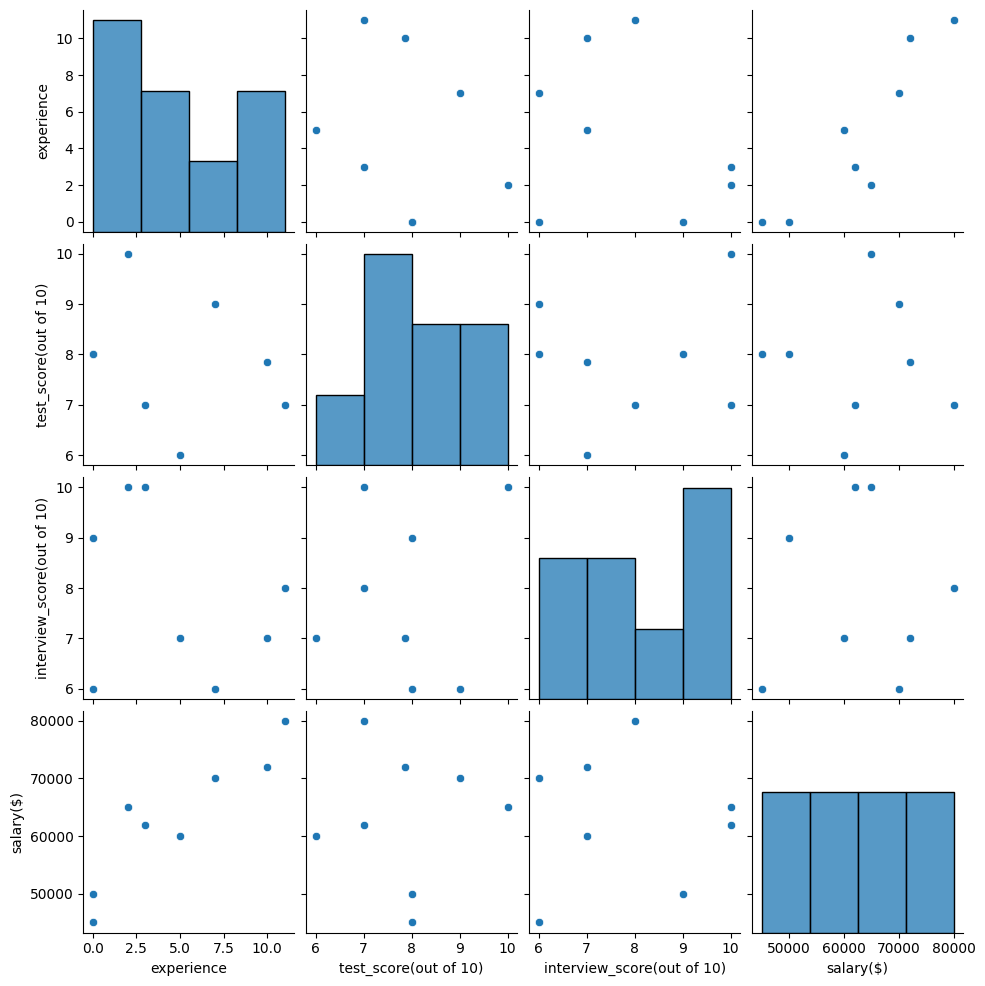

In [59]:
sns.pairplot(df)

<Axes: xlabel='experience', ylabel='salary($)'>

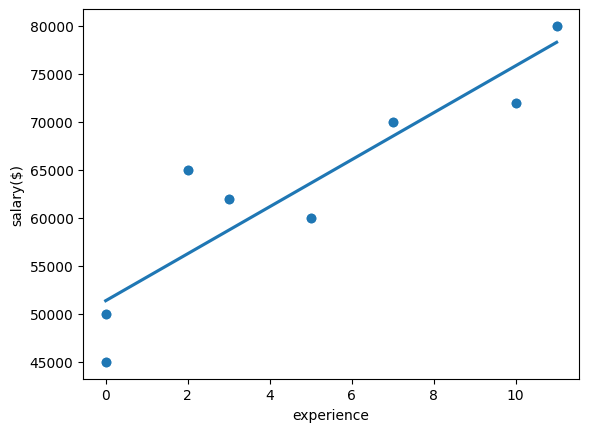

In [62]:
plt.scatter (df['experience'],df['salary($)'])
sns.regplot(x=df['experience'],y=df['salary($)'],data=df,ci=None)